# Natural Language Processing Project



## Data extraction 

#### Context

I will classify Yelp Reviews into 1 star or 5 star categories based on the text content in the reviews. 

I will use the [Yelp Review Data Set from Kaggle](https://www.kaggle.com/c/yelp-recsys-2013).



****

#### Content

Each observation in this dataset is a review of a particular business by a particular user.

The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.

The "cool" column is the number of "cool" votes this review received from other Yelp users. 

All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.

The "useful" and "funny" columns are similar to the "cool" column.

****

** Import some libraries we ususly use when we are analyzing the dataset. **

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

***

#### Loading data

In [62]:
yelp = pd.read_csv('yelp.csv')

## EDA

In [3]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [4]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.3+ KB


In [5]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


**Create a new column called "text length" which is the number of words in the text column.**

In [6]:
yelp['text length'] = yelp['text'].apply(len)

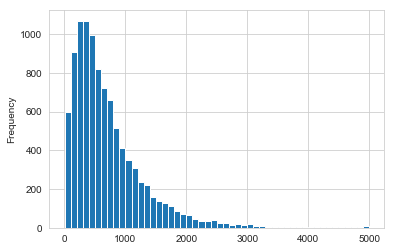

In [138]:
yelp["text length"].plot.hist(bins=50)

More users give the shorter reviews.

**Create a grid of 5 histograms of text length based on the star ratings.**

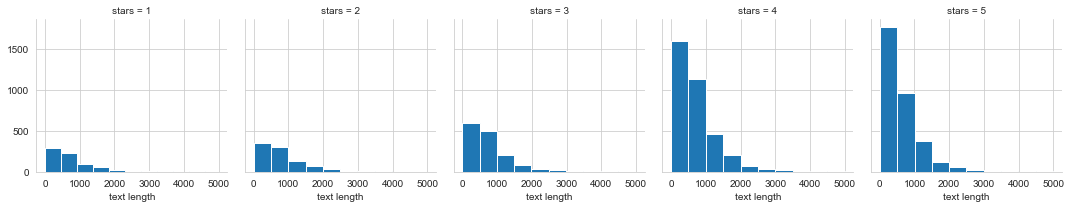

In [7]:
g = sns.FacetGrid(yelp,col='stars')
g.map(plt.hist,'text length')

Generally speaking, more users give 4 and 5 stars but the majority of users give shorter reviews.

**Create a countplot of the number of occurrences for each type of star rating.**

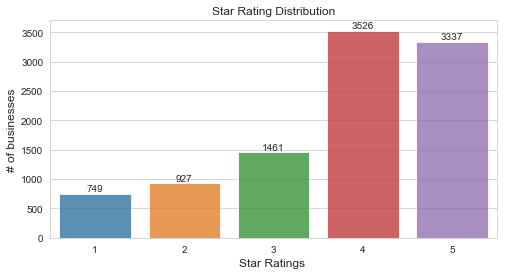

In [74]:
#Get the distribution of the ratings
x = yelp['stars'].value_counts()
x = x.sort_index()

#plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Star Rating Distribution")
plt.ylabel('# of businesses', fontsize=12)
plt.xlabel('Star Ratings ', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

** Use groupby to get the mean values of the numerical columns, you should be able to create this dataframe with the operation:**

In [80]:
from wordcloud import WordCloud, STOPWORDS

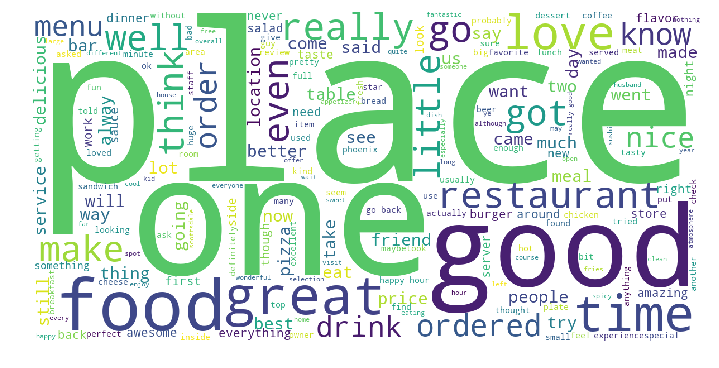

In [96]:
word_string=" ".join(yelp["text"]).replace('"','').lower()

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=STOPWORDS,
                          max_words=200,
                          scale=3,
                          max_font_size=400, 
                          random_state=42
                         ).generate(word_string)

plt.figure(1, figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Notice in the above plot:

Some of the most common words in all the review in the dataset are **place, one, good, food, great**. It makes sense that yelp is used for seaching the restaurants for food. It means people usually give those positive words after they use yelp.

When the reviews were given as 1 stars


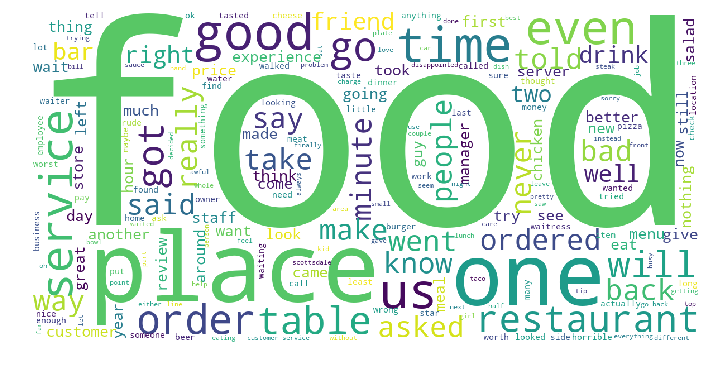

When the reviews were given as 5 stars


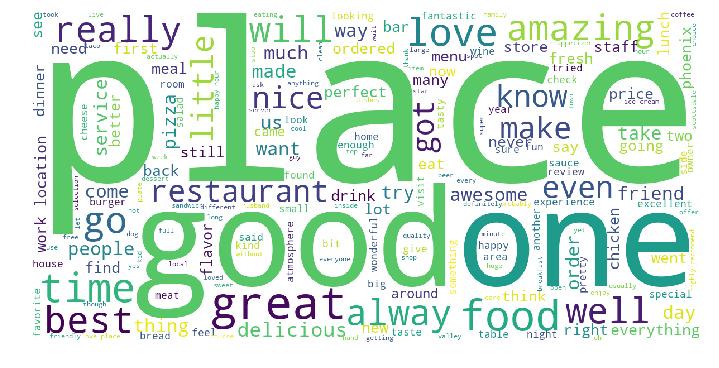

In [95]:
for i in [1,5]:

    plt.rcParams['font.size']=10
    plt.rcParams['figure.subplot.bottom']=.1 
    word_string=" ".join(yelp[yelp["stars"]==[i]]["text"]).replace('"','').lower()

    wordcloud = WordCloud(
                                background_color='white',
                                stopwords=STOPWORDS,
                                max_words=200,
                                scale=3,
                                max_font_size=400, 
                                random_state=42
                                ).generate(word_string)
    
    print("When the reviews were given as {} stars".format(i))
    plt.figure(1, figsize=(12, 12))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()



Notice in the above plot:

The figures are shown by 1 and 5 stars. We can obviously see that when the reviews were 5 stars, most users had a **good** in their reviews.

In [8]:
stars = yelp.groupby('stars').mean()
stars

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


**Testing correlation**

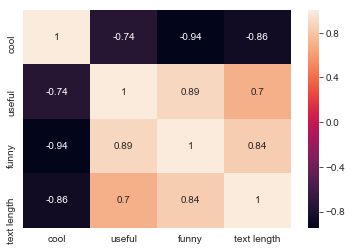

In [9]:
sns.heatmap(stars.corr(), annot= True)

It looks like funny and useful are highly correlacted as well as useful is correlated to the text length and we have some negative correlation between cool and funny, text length and useful.

## Data Cleaning

**Make a function to remove all punctuation and stopwords**

In [63]:
import string
from nltk.corpus import stopwords

def text_process(mess):
    """
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

## Machine learning - Naive Bayes algorithm

In [64]:
yelp_class = yelp[(yelp["stars"] == 1) | (yelp["stars"] == 5)]

In [65]:
yelp_class.shape

(4086, 10)

In [66]:
X = yelp_class['text']
y = yelp_class['stars']

**Import CountVectorizer, TFIDF, naive_bayes**

In [67]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import  TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

**Create a pipeline**

**Way 1**

In [8]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  
    ('tfidf', TfidfTransformer()),  
    ('classifier', MultinomialNB()),  
])

**Way 2**

In [68]:
pipeline1 = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  
    ('classifier', MultinomialNB()), 
])


**Split our data into training and testing data.**


In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

## Predictions and Evaluations 1

**Train a model**

In [ ]:
pipeline.fit(X_train, y_train)

In [123]:
predictions = pipeline.predict(X_test)

In [124]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test,predictions))
print(classification_report(predictions, y_test))

[[  0 228]
 [  0 998]]
             precision    recall  f1-score   support

          1       0.00      0.00      0.00         0
          5       1.00      0.81      0.90      1226

avg / total       1.00      0.81      0.90      1226



/Users/jason639782/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


It looks like the output is not really well. It has the bias

## Predictions and Evaluations 2


**Train a model**

In [71]:
pipeline1.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x1109b57b8>, binary=False,
        decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,
        stop_words=None, strip_accents=None,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, vocabulary=None)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [72]:
predictions = pipeline1.predict(X_test)

** Create a confusion matrix and classification report using these predictions and y_test **

In [73]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[143  85]
 [ 11 987]]


             precision    recall  f1-score   support

          1       0.93      0.63      0.75       228
          5       0.92      0.99      0.95       998

avg / total       0.92      0.92      0.92      1226



## Making prediction

In [137]:
testing = ["It is really useful, I would recommend my friends to use it"]
pipeline1.predict(testing)

array([5])

It looks like the prediction is well since it gives the 5 star and the review I mdel manually obviously is a good review. Honestly, it doesnt make any sense if we are making the prediction based on the given reviews becasue we can get what the stars they gave based on the data.